In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install bilby

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.3/832.3 kB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.8 MB/s eta 0:00:00


In [3]:
pip install mendeleev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 49.2 MB/s eta 0:00:00


In [4]:
pip install pymultinest==2.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.7 MB/s eta 0:00:00


In [5]:
pip install juliet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 kB 33.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backen

In [6]:
import math
import sys
import numpy as np
import pandas as pd
from numpy import linspace, arange, zeros
from matplotlib.pylab import plt
from mendeleev import element
from bilby import result
import bilby
import seaborn as sns

In [7]:
label = 'ldm'
outdir = 'outdir1'
bilby.utils.check_directory_exists_and_if_not_mkdir(outdir)

In [36]:
def model(k,l,Gamma0 ):
  E0=(k*((A)**(-0.33)))+(l*(A)**(-0.167))
  a=az[3,:]
  n=az[2,:]
  z=az[4,:]
  EGamma=az[0,:]


  Gammar1= Gamma0*((1.2*(A**0.33))/((R1)**1.6))
  Gammar2= Gamma0*((1.2*(A**0.33))/((R2)**1.6))
  Gammar3= Gamma0*((1.2*(A**0.33))/((R3)**1.6))

  E1=E0*((1.2*(A**0.33))/(R1))
  E2=E0*((1.2*(A**0.33))/(R2))
  E3=E0*((1.2*(A**0.33))/(R3))


  F1=((n*z)/a)*(((EGamma*Gammar1)**2)/((EGamma**2)-(E1**2))**2)+((EGamma*Gammar1)**2)
  F2=((n*z)/a)*(((EGamma*Gammar2)**2)/((EGamma**2)-(E2**2))**2)+((EGamma*Gammar2)**2)
  F3=((n*z)/a)*(((EGamma*Gammar3)**2)/((EGamma**2)-(E3**2))**2)+((EGamma*Gammar3)**2)
  FinalF = F1+F2+F3
  return FinalF

In [14]:
from pandas.core.internals.blocks import F
EGamma, Gammar, N, A, Z, beta, R0, R1, R2, R3 = np.loadtxt('GDRdata.dat',usecols=(0,1,2,3,4,5,6,7,8,9), unpack= True)

az = np.vstack((EGamma, Gammar, N, A, Z, beta))
x = az

k=18
l=25
Gamma0=3.64
E0=(k*((A)**(-0.33)))+(l*(A)**(-0.167))
a=az[3,:]
n=az[2,:]
z=az[4,:]
EGamma=az[0,:]


Gammar1= Gamma0*((1.2*(A**0.33))/((R1)**1.6))
Gammar2= Gamma0*((1.2*(A**0.33))/((R2)**1.6))
Gammar3= Gamma0*((1.2*(A**0.33))/((R3)**1.6))

E1=E0*((1.2*(A**0.33))/(R1))
E2=E0*((1.2*(A**0.33))/(R2))
E3=E0*((1.2*(A**0.33))/(R3))


F1=((n*z)/a)*(((EGamma*Gammar1)**2)/((EGamma**2)-(E1**2))**2)+((EGamma*Gammar1)**2)
F2=((n*z)/a)*(((EGamma*Gammar2)**2)/((EGamma**2)-(E2**2))**2)+((EGamma*Gammar2)**2)
F3=((n*z)/a)*(((EGamma*Gammar3)**2)/((EGamma**2)-(E3**2))**2)+((EGamma*Gammar3)**2)



FinalF = F1+F2+F3
FinalF


data = model(k,l,Gamma0)

ndata = len(data)
P = open('results.out','w')
print('ndata=',ndata, file=P)

In [15]:
N

array([  3.,   4.,   5.,   5.,   6.,   7.,   8.,   7.,   8.,   8.,   9.,
        10.,  10.,  12.,  12.,  13.,  14.,  14.,  14.,  15.,  16.,  16.,
        18.,  22.,  20.,  22.,  24.,  28.,  24.,  26.,  28.,  28.,  30.,
        28.,  32.,  30.,  32.,  34.,  36.,  34.,  35.,  38.,  40.,  42.,
        44.,  42.,  42.,  44.,  46.,  48.,  50.,  50.,  51.,  52.,  54.,
        52.,  50.,  52.,  54.,  56.,  58.,  58.,  62.,  60.,  62.,  66.,
        62.,  64.,  66.,  67.,  68.,  69.,  70.,  72.,  74.,  72.,  74.,
        76.,  78.,  74.,  78.,  82.,  82.,  82.,  82.,  82.,  82.,  83.,
        84.,  85.,  86.,  88.,  90.,  82.,  86.,  88.,  90.,  92.,  88.,
        90.,  88.,  90.,  92.,  94.,  96.,  94.,  98., 100., 104., 104.,
       104., 106., 108., 108., 108., 110., 112., 110., 110., 112., 113.,
       114., 116., 114., 116., 116., 117., 118., 120., 118., 122., 124.,
       124., 125., 126., 126., 142., 141., 142., 143., 144., 146., 144.,
       144.])

In [16]:
A

array([  6.,   7.,   9.,  10.,  12.,  13.,  14.,  14.,  15.,  16.,  17.,
        18.,  19.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,
        34.,  40.,  40.,  42.,  44.,  48.,  46.,  48.,  51.,  52.,  55.,
        54.,  59.,  58.,  60.,  63.,  65.,  64.,  65.,  70.,  72.,  74.,
        76.,  75.,  76.,  78.,  80.,  82.,  89.,  90.,  91.,  92.,  94.,
        93.,  92.,  94.,  96.,  98., 100., 103., 108., 107., 109., 115.,
       112., 114., 116., 117., 118., 119., 120., 122., 124., 124., 126.,
       128., 130., 127., 133., 138., 139., 140., 140., 141., 142., 143.,
       144., 145., 146., 148., 150., 144., 148., 150., 152., 154., 151.,
       153., 152., 154., 156., 158., 160., 159., 165., 168., 174., 175.,
       176., 178., 180., 181., 182., 184., 186., 185., 186., 188., 189.,
       190., 192., 191., 193., 194., 195., 196., 198., 197., 203., 205.,
       206., 207., 208., 209., 232., 233., 234., 235., 236., 238., 237.,
       238.])

In [17]:
Z

array([ 3.,  3.,  4.,  5.,  6.,  6.,  6.,  7.,  7.,  8.,  8.,  8.,  9.,
       11., 12., 12., 12., 13., 14., 14., 14., 16., 16., 18., 20., 20.,
       20., 20., 22., 22., 23., 24., 25., 26., 27., 28., 28., 29., 29.,
       30., 30., 32., 32., 32., 32., 33., 34., 34., 34., 34., 39., 40.,
       40., 40., 40., 41., 42., 42., 42., 42., 42., 45., 46., 47., 47.,
       49., 50., 50., 50., 50., 50., 50., 50., 50., 50., 52., 52., 52.,
       52., 53., 55., 56., 57., 58., 58., 59., 60., 60., 60., 60., 60.,
       60., 60., 62., 62., 62., 62., 62., 63., 63., 64., 64., 64., 64.,
       64., 65., 67., 68., 70., 71., 72., 72., 72., 73., 74., 74., 74.,
       75., 76., 76., 76., 76., 76., 77., 77., 78., 78., 78., 78., 79.,
       81., 81., 82., 82., 82., 83., 90., 92., 92., 92., 92., 92., 93.,
       94.])

In [18]:
beta

array([0.        , 0.        , 0.        , 0.        , 0.57660112,
       0.        , 0.3593845 , 0.        , 0.        , 0.35304191,
       0.        , 0.36549826, 0.        , 0.        , 0.61309022,
       0.        , 0.48392864, 0.        , 0.41192384, 0.        ,
       0.33035683, 0.31404051, 0.24745597, 0.26567243, 0.11736477,
       0.24480406, 0.26183039, 0.10732916, 0.31841807, 0.26161825,
       0.        , 0.2123179 , 0.        , 0.20302967, 0.        ,
       0.17908271, 0.20515147, 0.        , 0.        , 0.23637649,
       0.        , 0.22569876, 0.240203  , 0.20089738, 0.1878493 ,
       0.        , 0.21876214, 0.26997107, 0.23172397, 0.19416389,
       0.        , 0.09188896, 0.        , 0.10053684, 0.08799243,
       0.        , 0.1715299 , 0.15108185, 0.1715299 , 0.16910538,
       0.23082375, 0.        , 0.24345183, 0.        , 0.        ,
       0.        , 0.12262177, 0.10540816, 0.11173303, 0.        ,
       0.11014251, 0.        , 0.10707759, 0.10279377, 0.09516

In [19]:
EGamma

array([23.69, 18.59, 23.75, 21.72, 22.86, 24.6 , 15.41, 23.05, 24.78,
       23.7 , 23.4 , 19.08, 21.61, 17.43, 19.51, 22.06, 17.38, 20.73,
       19.81, 20.7 , 20.86, 19.51, 20.89, 19.86, 20.58, 20.11, 19.6 ,
       19.7 , 19.96, 19.78, 17.9 , 19.16, 16.43, 19.35, 16.43, 18.78,
       16.69, 16.43, 16.92, 16.23, 16.17, 15.16, 17.88, 14.49, 16.4 ,
       14.98, 15.67, 14.97, 16.6 , 16.  , 16.74, 16.82, 16.58, 16.26,
       16.21, 16.58, 17.16, 16.53, 16.11, 15.79, 15.72, 16.24, 14.97,
       15.83, 13.54, 15.72, 15.62, 15.82, 15.55, 15.64, 15.43, 15.53,
       15.37, 15.34, 15.31, 15.23, 15.15, 15.12, 15.11, 14.77, 15.33,
       15.13, 15.24, 15.03, 14.85, 15.19, 14.95, 15.  , 15.04, 14.94,
       14.73, 12.78, 12.3 , 15.31, 14.82, 14.59, 12.39, 12.17, 13.88,
       12.33, 11.79, 11.97, 12.46, 11.86, 12.28, 12.42, 12.38, 12.09,
       12.5 , 12.32, 12.34, 12.42, 12.55, 12.19, 11.98, 11.92, 13.04,
       12.59, 12.73, 12.81, 12.92, 13.1 , 12.59, 12.72, 12.86, 13.42,
       12.99, 13.28,

In [20]:
Gammar

array([ 5.26, 16.28,  9.47,  9.08,  3.61,  8.43,  5.82,  6.95, 12.82,
        5.36,  5.48,  2.12, 12.57,  3.1 ,  2.71,  6.09,  2.15,  7.45,
        2.56,  5.6 ,  7.4 ,  4.83,  9.61,  9.12,  6.23,  8.07, 11.33,
        6.23,  6.92,  8.42,  4.55,  6.19,  2.95,  5.5 ,  2.73,  5.57,
        3.47,  4.84,  8.09,  3.25,  3.06,  5.92,  5.71,  3.47,  7.04,
        3.66,  6.33,  3.91,  6.8 ,  5.68,  4.23,  3.99,  4.17,  4.64,
        5.25,  4.95,  4.68,  5.12,  5.64,  5.9 ,  7.68,  7.49,  5.42,
        6.49,  3.49,  5.57,  5.01,  6.08,  5.06,  5.02,  4.84,  4.78,
        5.08,  4.73,  4.94,  5.5 ,  5.36,  5.3 ,  4.98,  4.09,  5.28,
        4.51,  4.82,  4.39,  5.08,  4.23,  4.46,  4.73,  5.25,  6.27,
        5.74,  4.03,  3.38,  4.42,  5.06,  5.92,  2.99,  2.8 ,  4.69,
        2.77,  3.03,  2.65,  3.14,  2.94,  3.33,  2.71,  2.59,  3.66,
        3.41,  2.59,  2.77,  4.89,  4.71,  2.93,  3.91,  4.52,  6.6 ,
        2.22,  2.34,  2.83,  3.07,  3.34,  2.13,  2.08,  1.9 ,  3.61,
        2.92,  3.1 ,

In [21]:
R0

array([  13.00536092,   15.96473225,   22.30097155,   25.65554507,
         32.69582523,   36.36854316,   40.13576392,   40.13576392,
         43.99290295,   47.93589308,   51.96109702,   56.065239  ,
         60.24535049,   77.67464337,   82.19817922,   86.7843585 ,
         91.43149034,   96.13799321,  100.9023841 ,  105.723269  ,
        110.5993348 ,  120.5121174 ,  130.6315878 ,  162.1515239 ,
        162.1515239 ,  173.0225874 ,  184.0658861 ,  206.6484213 ,
        195.2761312 ,  206.6484213 ,  224.0008056 ,  229.8612124 ,
        247.6644221 ,  241.6934865 ,  271.9032643 ,  265.7911263 ,
        278.0496861 ,  296.6908664 ,  309.2829723 ,  302.9706868 ,
        309.2829723 ,  341.3199232 ,  354.3508397 ,  367.5017685 ,
        380.7705259 ,  374.1215512 ,  380.7705259 ,  394.155025  ,
        407.6532685 ,  421.2633429 ,  469.7534246 ,  476.7863173 ,
        483.845045  ,  490.9294172 ,  505.17435   ,  498.0392468 ,
        490.9294172 ,  505.17435   ,  519.5196587 ,  533.96393

In [22]:
R1

array([  13.00536092,   15.96473225,   22.30097155,   25.65554507,
         32.69582523,   36.36854316,   40.13576392,   40.13576392,
         43.99290295,   47.93589308,   51.96109702,   56.065239  ,
         60.24535049,   77.67464337,   82.19817922,   86.7843585 ,
         91.43149034,   96.13799321,  100.9023841 ,  105.723269  ,
        110.5993348 ,  120.5121174 ,  130.6315878 ,  162.1515239 ,
        162.1515239 ,  173.0225874 ,  184.0658861 ,  206.6484213 ,
        195.2761312 ,  206.6484213 ,  224.0008056 ,  229.8612124 ,
        247.6644221 ,  241.6934865 ,  271.9032643 ,  265.7911263 ,
        278.0496861 ,  296.6908664 ,  309.2829723 ,  302.9706868 ,
        309.2829723 ,  341.3199232 ,  354.3508397 ,  367.5017685 ,
        380.7705259 ,  374.1215512 ,  380.7705259 ,  394.155025  ,
        407.6532685 ,  421.2633429 ,  469.7534246 ,  476.7863173 ,
        483.845045  ,  490.9294172 ,  505.17435   ,  498.0392468 ,
        490.9294172 ,  505.17435   ,  519.5196587 ,  533.96393

In [23]:
R2

array([  13.00536092,   15.96473225,   22.30097155,   25.65554507,
         32.69582523,   36.36854316,   40.13576392,   40.13576392,
         43.99290295,   47.93589308,   51.96109702,   56.065239  ,
         60.24535049,   77.67464337,   82.19817922,   86.7843585 ,
         91.43149034,   96.13799321,  100.9023841 ,  105.723269  ,
        110.5993348 ,  120.5121174 ,  130.6315878 ,  162.1515239 ,
        162.1515239 ,  173.0225874 ,  184.0658861 ,  206.6484213 ,
        195.2761312 ,  206.6484213 ,  224.0008056 ,  229.8612124 ,
        247.6644221 ,  241.6934865 ,  271.9032643 ,  265.7911263 ,
        278.0496861 ,  296.6908664 ,  309.2829723 ,  302.9706868 ,
        309.2829723 ,  341.3199232 ,  354.3508397 ,  367.5017685 ,
        380.7705259 ,  374.1215512 ,  380.7705259 ,  394.155025  ,
        407.6532685 ,  421.2633429 ,  469.7534246 ,  476.7863173 ,
        483.845045  ,  490.9294172 ,  505.17435   ,  498.0392468 ,
        490.9294172 ,  505.17435   ,  519.5196587 ,  533.96393

In [24]:
R3

array([  13.00536092,   15.96473225,   22.30097155,   25.65554507,
         32.69582523,   36.36854316,   40.13576392,   40.13576392,
         43.99290295,   47.93589308,   51.96109702,   56.065239  ,
         60.24535049,   77.67464337,   82.19817922,   86.7843585 ,
         91.43149034,   96.13799321,  100.9023841 ,  105.723269  ,
        110.5993348 ,  120.5121174 ,  130.6315878 ,  162.1515239 ,
        162.1515239 ,  173.0225874 ,  184.0658861 ,  206.6484213 ,
        195.2761312 ,  206.6484213 ,  224.0008056 ,  229.8612124 ,
        247.6644221 ,  241.6934865 ,  271.9032643 ,  265.7911263 ,
        278.0496861 ,  296.6908664 ,  309.2829723 ,  302.9706868 ,
        309.2829723 ,  341.3199232 ,  354.3508397 ,  367.5017685 ,
        380.7705259 ,  374.1215512 ,  380.7705259 ,  394.155025  ,
        407.6532685 ,  421.2633429 ,  469.7534246 ,  476.7863173 ,
        483.845045  ,  490.9294172 ,  505.17435   ,  498.0392468 ,
        490.9294172 ,  505.17435   ,  519.5196587 ,  533.96393

In [25]:
injection_parameters = dict(k=18, l=25, Gamma0=3.64)
n = len(Z)
#sigma = np.random.normal(1, 0.01, n)
sigma = 3.075

In [26]:
likelihood = bilby.likelihood.GaussianLikelihood(az, data, model,
sigma)

In [27]:
priors = dict()
priors['k'] = bilby.core.prior.Uniform(16,20 , '$k$',unit='MeV')
priors['l'] = bilby.core.prior.Uniform(23,27, '$l$',unit='MeV')
priors['Gamma0'] = bilby.core.prior.Uniform(2.5, 4, '$Gamma0$',unit='MeV')


In [28]:
result = bilby.run_sampler(
    likelihood=likelihood, priors=priors, sampler='dynesty', nlive=500,
    sample='unif', injection_parameters=injection_parameters, outdir=outdir,
    label=label)
result.plot_corner(priors=True,label_kwargs={"fontsize": 25},title_kwargs=dict(fontsize=20),max_n_ticks=3,smooth=1.0)
result.plot_marginals()
print( result.log_evidence, result.log_evidence_err,
            np.log(result.occam_factor(priors)))

09:03 bilby INFO    : Running for label 'ldm', output will be saved to 'outdir1'
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
09:03 bilby INFO    : Analysis priors:
09:03 bilby INFO    : k=Uniform(minimum=16, maximum=20, name='$k$', latex_label='$k$', unit='MeV', boundary=None)
09:03 bilby INFO    : l=Uniform(minimum=23, maximum=27, name='$l$', latex_label='$l$', unit='MeV', boundary=None)
09:03 bilby INFO    : Gamma0=Uniform(minimum=2.5, maximum=4, name='$Gamma0$', latex_label='$Gamma0$', unit='MeV', boundary=None)
09:03 bilby INFO    : Analysis likelihood class: <class 'bilby.core.likelihood.GaussianLikelihood'>
09:03 bilby INFO    : Analysis likelihood noise evidence: nan
09:03 bilby INFO    : Single likelihood evaluation took 2.188e-04 s
09:03 bilby INFO    : Using sampler Dynesty with kwargs {'nlive': 500, 'bound': 'live', 'sample': 'unif', 'periodic': N

1it [00:00, ?it/s]

09:03 bilby INFO    : Written checkpoint file outdir1/ldm_resume.pickle
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImp

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

-1766.633329325571 0.07342174279277194 -11.486679302557842


In [29]:
k_fit=result.get_one_dimensional_median_and_error_bar('k')
k1 = k_fit.median
l_fit=result.get_one_dimensional_median_and_error_bar('l')
l1 = l_fit.median
Gamma0_fit=result.get_one_dimensional_median_and_error_bar('Gamma0')
Gamma01 = Gamma0_fit.median

print(k1,l1,Gamma01)
data_fit = model(k,l,Gamma0)

17.910622073869654 24.966266470294578 3.63732072718226


In [30]:
cov_mat = result.covariance_matrix
nrow,ncol=np.shape(cov_mat)
print('row and columns',nrow,ncol)
corr=np.empty((nrow,ncol))
for i in range(0,nrow):
    for j in range(0,ncol):
        corr[i][j]=cov_mat[i][j] /np.sqrt(cov_mat[i][i]*cov_mat[j][j])

row and columns 3 3


In [31]:
np.set_printoptions(precision=3)
#print(corr,file=output)
#print('Correlationmatrix',file=P)
#print(corr,file=P)
#utput.close()
print(corr)

[[ 1.    -0.014 -0.061]
 [-0.014  1.    -0.016]
 [-0.061 -0.016  1.   ]]


<Axes: >

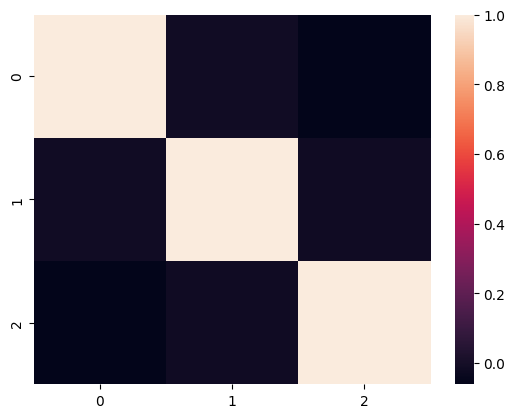

In [32]:
sns.heatmap(corr)

In [33]:
FinalF

array([2.852e+01, 1.009e+01, 6.671e+00, 3.820e+00, 2.196e+00, 1.907e+00,
       5.734e-01, 1.283e+00, 1.157e+00, 8.391e-01, 6.577e-01, 3.561e-01,
       3.760e-01, 1.231e-01, 1.323e-01, 1.461e-01, 7.874e-02, 9.780e-02,
       7.836e-02, 7.542e-02, 6.780e-02, 4.702e-02, 4.335e-02, 2.184e-02,
       2.345e-02, 1.879e-02, 1.510e-02, 1.116e-02, 1.335e-02, 1.125e-02,
       7.407e-03, 7.914e-03, 4.757e-03, 7.047e-03, 3.696e-03, 5.134e-03,
       3.590e-03, 2.919e-03, 2.767e-03, 2.692e-03, 2.527e-03, 1.702e-03,
       2.139e-03, 1.273e-03, 1.481e-03, 1.296e-03, 1.353e-03, 1.124e-03,
       1.262e-03, 1.073e-03, 8.748e-04, 8.484e-04, 7.923e-04, 7.327e-04,
       6.740e-04, 7.327e-04, 8.160e-04, 7.008e-04, 6.172e-04, 5.505e-04,
       5.074e-04, 4.869e-04, 3.490e-04, 4.034e-04, 2.763e-04, 3.070e-04,
       3.333e-04, 3.208e-04, 2.912e-04, 2.856e-04, 2.696e-04, 2.650e-04,
       2.519e-04, 2.364e-04, 2.221e-04, 2.198e-04, 2.053e-04, 1.933e-04,
       1.825e-04, 1.897e-04, 1.731e-04, 1.477e-04, 

In [34]:
print('Parameters', file =P)
data1 = { 'l':[l_fit.median], 'plus':[k_fit.plus], 'minus':[k_fit.minus]}
data2 = { 'k':[k_fit.median], 'plus':[l_fit.plus], 'minus':[l_fit.minus]}
data3 = { 'Gaama0':[Gamma0_fit.median], 'plus':[Gamma0_fit.plus], 'minus':[Gamma0_fit.minus]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

print(df1.to_string(index=False),file=P)
print(df2.to_string(index=False),file=P)
print(df3.to_string(index=False),file=P)


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


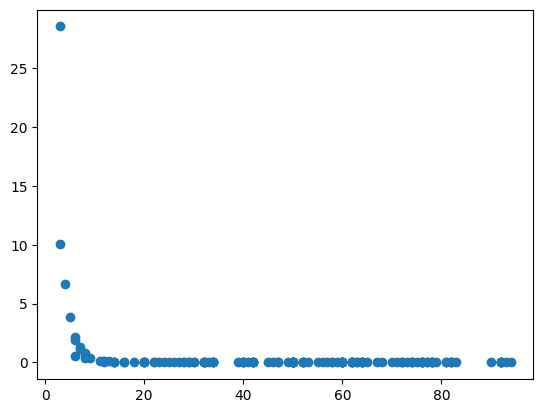

In [35]:
fig, ax = plt.subplots()

ax.scatter(Z, FinalF)